# DI 501 Assignment 1

### Due: April 2, Sunday by 23:59
---

### Submission and Grading Principles

* Submit your assignments to the corresponding assignment module in https://odtuclass.metu.edu.tr.

* Solutions should be submitted in a single **ipynb** file named: name_surname_a1.ipynb (e.g., “volga_sezen_a1.ipynb”).

* Late submissions will be accepted by April 5, 2023, 23:59 with a 10% per day penalty.

* Add your code to the code blocks below each part, and your commentary in the markdown blocks below them.

* **<font color=#C91515>This is an individual assignment. Please do not collaborate. You have to adhere to the academic integrity principles.</font>** 

* Provide commentary on your results wherever appropriate. Insights about data are only generated through reasoning,<br>so no matter how you get numbers, tables, or graphics, your interpretations are even more crucial to gauge your understanding.

------------

### The aim of this assignment is getting you familiar with:

* Python and Jupyter notebooks,

* Simple data cleaning,

* Descriptive statistics interpretation, and

* Visualization methods.

------------

### Metadata and Brief Info

This data was sampled from a catalog of stars observed with LAMOST as part of the LEAGUE sky survey. 

Each row corresponds to a single star, and the following attributes are given for each:

| Variable Name    | Explanation                                                                              |
|----------|--------------------------------------------------------------------------------------------------|
| obsid    | Unique identifier number for the star                                                            |
| obsdate  | Observation date       (dd/mm/yyyy)                                                                          |
| ra       | Right ascension, astronomical coordinate analogous to the x direction (Degree)                            |
| dec      | Declination, astronomical coordinate analogous to the y direction (Degree)                                |
| subclass | Luminosity* (first lowercase letters if exists) and Spectral** (capital letter and digit) classes           |
| mag5     | Measured brightness of the star in the infrared (Magnitude)                                                 |
| z        | Estimated redshift amount (Fraction change)                                                                                |
| z_err    | Window of uncertainty for redshift                                                                |
| rv       | Radial velocity (along line of sight) of the star estimated by the doppler effect (Km/s)                                   |
| rv_err   | Window of uncertainty for relative velocity                                                      |
| logg     | Estimated surface gravity in logarithmic scale (Dex, $10^x$, compared to the Sun)                                                   |
| logg_err | Window of uncertainty for surface gravity                                                        |
| teff     | Estimated effective temperature of the surface (Kelvin)                                                  |
| teff_err | Window of uncertainty for surface temperature                                                    |
| feh      | Estimated element composition for elements heavier than hydrogen (Dex, $10^x$, compared to the Sun)                                |
| feh_err  | Window of uncertainty for heavier element composition                                            |

(*) Luminosity classes are indicated by designations g for giant, d for dwarf (like our Sun) and sd for subdwarf. <br>
(**) Spectral classes are made up of the main class (the letter) and the digit portion allows for smooth transition. (A star right in-between A and F is labeled A5.)

------------

### 1) Environment setup
Import numpy, pandas, matplotlib and seaborn, along with other libraries you may utilize.

In [108]:
#pip install statsmodels
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm

### 2) Initial inspection (5p)

Load the data given and show how many observations and features exist.<br>Then show the last 6 rows.

In [2]:
df= pd.read_csv("stars.csv")
df.shape
df.tail(6)

,Unnamed: 0,obsid,obsdate,ra,dec,subclass,mag5,z,z_err,rv,rv_err,logg,logg_err,teff,teff_err,feh,feh_err
10267,93159,165213155,16/10/2013,14.072438,41.963177,F7,-999.000000,-0.000038,0.000012,-11.52,3.46,4.246,0.033,6293.13,24.08,-0.090,0.019
10268,424,180509119,19/11/2013,35.684043,43.916172,F6,18.194901,-0.000168,0.000009,-50.34,2.80,4.274,0.030,6206.77,20.70,-0.565,0.018
10269,34524,144910171,14/04/2013,123.664420,24.448504,F5,18.529301,-0.000019,0.000022,-5.71,6.72,4.147,0.077,6458.12,56.48,-0.186,0.055
10270,28301,126711227,22/02/2013,91.852697,-1.643610,G5,12.818800,0.000099,0.000008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10271,98518,495305018,15/12/2016,56.185057,44.849996,A9,-999.000000,-0.000069,0.000004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10272,38650,15208002,13/12/2011,22.965792,31.464055,K7,-999.000000,-9999.000000,-9999.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3) Faulty values (5p)

Some of the measurements and estimations are not labeled as missing but still look dubious.<br>Use descriptive statistics to quickly find these hidden missing values and recode them as NaNs.

In [3]:
df.describe()
# The -9999.000000 and -999.000000 values are seemed dubious since the minimum value and the %25 quartile values differ significantly and high sd values.
dubious_columns= df[['mag5', 'z', 'z_err']]
for col in dubious_columns:
    df[col]= df[col].replace({-9999.000000:np.nan, -999.000000:np.nan})


### 4) Data cleaning (15p)

* Drop rows which contain missing values in (equal to and) more than a third of their fields.

* Define a new variable called "class" that only consists of the main spectral class. (capital letter portion)

* "mag5" column corresponds to brightness observed at 963.3 nanometers, which can pass through our atmosphere.<br>This frequency is the same as the central frequency of the y band of Pan-STARSS1 telescope.<br> Rename the column to "panstarss1_y" to reflect this.

* Recode the "date" column as a DateTime object.

* Show that your methods worked by exposing each columns' data type and other information.

In [4]:
df= df[df.isnull().sum(axis=1) <= (len(df.columns)/3)]
df['class']= df['subclass'].str.extract(r'([A-Z])')
df.rename(columns={'mag5': 'panstarss1_y'}, inplace= True )
df['obsdate']= pd.to_datetime(df['obsdate'])
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7515 entries, 1 to 10269
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    7515 non-null   int64         
 1   obsid         7515 non-null   int64         
 2   obsdate       7515 non-null   datetime64[ns]
 3   ra            7515 non-null   float64       
 4   dec           7515 non-null   float64       
 5   subclass      7515 non-null   object        
 6   panstarss1_y  3382 non-null   float64       
 7   z             7515 non-null   float64       
 8   z_err         7515 non-null   float64       
 9   rv            6775 non-null   float64       
 10  rv_err        6775 non-null   float64       
 11  logg          7515 non-null   float64       
 12  logg_err      7515 non-null   float64       
 13  teff          7515 non-null   float64       
 14  teff_err      7515 non-null   float64       
 15  feh           6775 non-null   float64

/var/folders/p4/gt0bmgp10gn242647ws6d0gc0000gn/T/ipykernel_992/2148136680.py:4: UserWarning: Parsing '28/11/2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['obsdate']= pd.to_datetime(df['obsdate'])
/var/folders/p4/gt0bmgp10gn242647ws6d0gc0000gn/T/ipykernel_992/2148136680.py:4: UserWarning: Parsing '30/01/2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['obsdate']= pd.to_datetime(df['obsdate'])
/var/folders/p4/gt0bmgp10gn242647ws6d0gc0000gn/T/ipykernel_992/2148136680.py:4: UserWarning: Parsing '18/11/2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['obsdate']= pd.to_datetime(df['obsdate'])
/var/folders/p4/gt0bmgp10gn242647ws6d0gc0000gn/T/ipykernel_992/2148136680.py:4: UserWarning: Parsing '21/02/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['o

### 5) Interpreting descriptive statistics (10p)

Just by looking at descriptive statistics (and no graphs yet) of each numeric column determine whether they possess a left-skewed,<br>  right-skewed, or a symmetric distribution.

In [5]:
df.describe()

,Unnamed: 0,obsid,ra,dec,panstarss1_y,z,z_err,rv,rv_err,logg,logg_err,teff,teff_err,feh,feh_err
count,7515.000000,7.515000e+03,7515.000000,7515.000000,3382.000000,7515.000000,7515.000000,6775.000000,6775.000000,7515.000000,7515.000000,7515.000000,7515.000000,6775.000000,6775.000000
mean,51465.177112,3.587535e+08,144.254714,26.153458,15.645607,-0.000027,-0.000514,-7.814066,5.403108,4.098412,0.096078,5446.203222,59.008512,-0.249618,0.054641
std,29471.534539,2.162104e+08,91.213018,16.476167,2.205905,0.000192,0.023067,47.210103,2.333900,0.719558,0.073747,1084.422310,39.409242,0.349996,0.042904
min,0.000000,2.022160e+05,0.097141,-9.155958,7.938080,-0.004136,-1.000000,-372.520000,0.740000,0.236000,0.005000,3000.000000,4.040000,-2.411000,0.002000
25%,26093.500000,1.836536e+08,77.692909,13.556714,13.798775,-0.000106,0.000013,-31.520000,3.910000,3.981000,0.043000,4791.715000,30.585000,-0.430000,0.025000
50%,51502.000000,3.346042e+08,123.228570,26.197034,15.304750,-0.000024,0.000016,-7.010000,4.880000,4.229000,0.068000,5510.500000,46.480000,-0.207000,0.039000
75%,76819.000000,5.246012e+08,202.901417,38.969830,17.406500,0.000058,0.000021,17.825000,6.320000,4.545000,0.135000,6025.285000,79.110000,-0.021000,0.075000
max,102715.000000,8.239081e+08,359.942254,87.459423,21.045300,0.004153,0.000300,354.830000,34.670000,5.500000,1.112000,12778.800000,657.300000,0.971000,0.729000


> <br> If mean greater than the median, the distribution is right-skewed.<br> 
<br>If median greater than the mean, the distribution is left-skewed.<br> 
<br> If they are approximately equal, the distribution is symmetrical.<br> 
<br> Unnamed:0 : left-skewed<br> 
<br> obsid: right-skewed<br> 
<br> ra: right-skewed<br> 
<br> dec: symmetrical<br> 
<br> panstarss1_y: symmetrical<br> 
<br> z: symmetrical<br> 
<br> z_err: left-skewed<br> 
<br> rv:left-skewed<br> 
<br> rv_err: right-skewed<br> 
<br> logg: symmetrical, slightly left-skewed<br> 
<br> logg_err: right-skewed<br> 
<br> teff: left-skewed<br> 
<br> teff_err: right-skewed<br> 
<br> feh: symmetrical<br> 
<br> feh_err: right-skewed <br> 

### 6) Visualizing distributions (15p)

* Visualize the distributions of numeric variables and determine whether they are close to a gaussian distribution or not.<br>Provide additional commentary for any peculiarities you spot. (You can use subplots and loops to put multiple graphs inside the same figure.)

* For the categorical variables, use appropriate visualisations and comment on whether the sample is balanced or not.

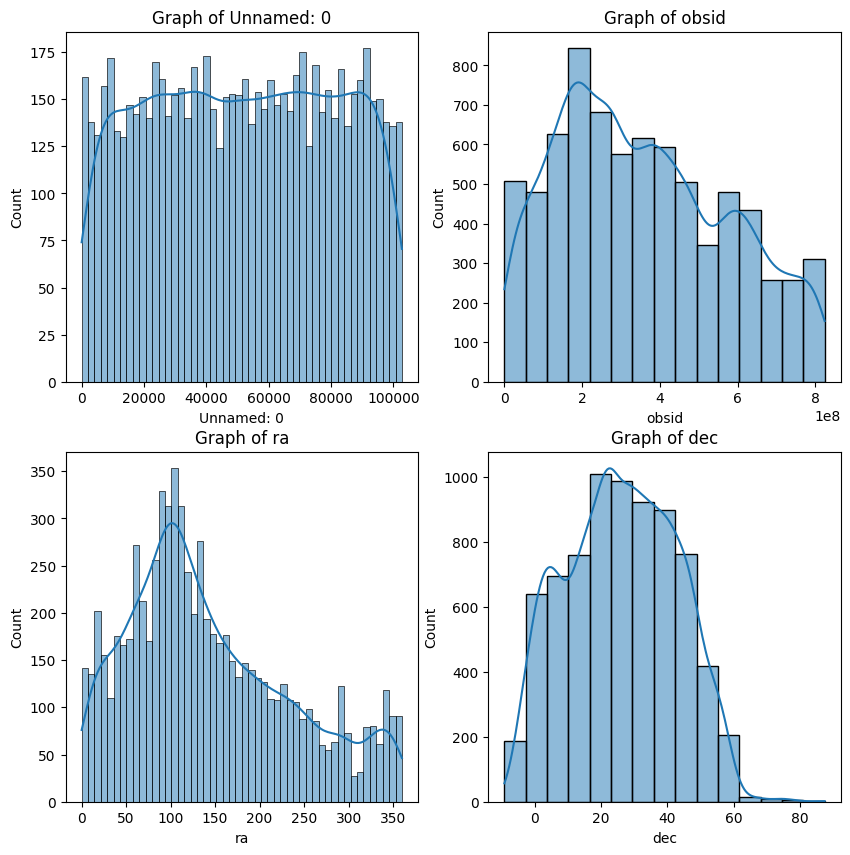

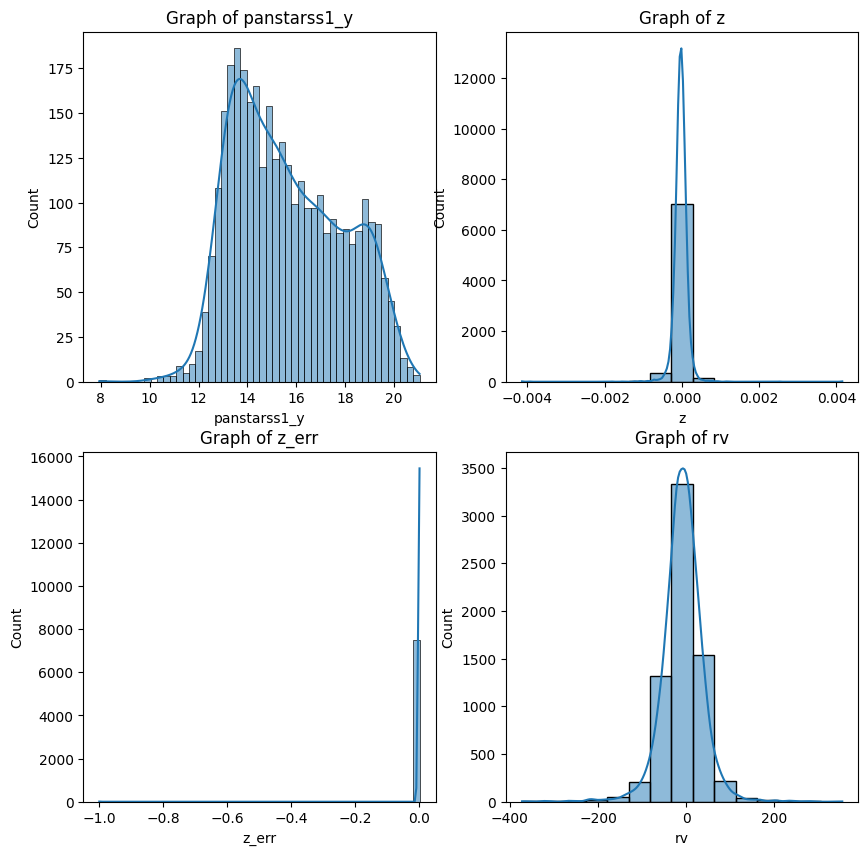

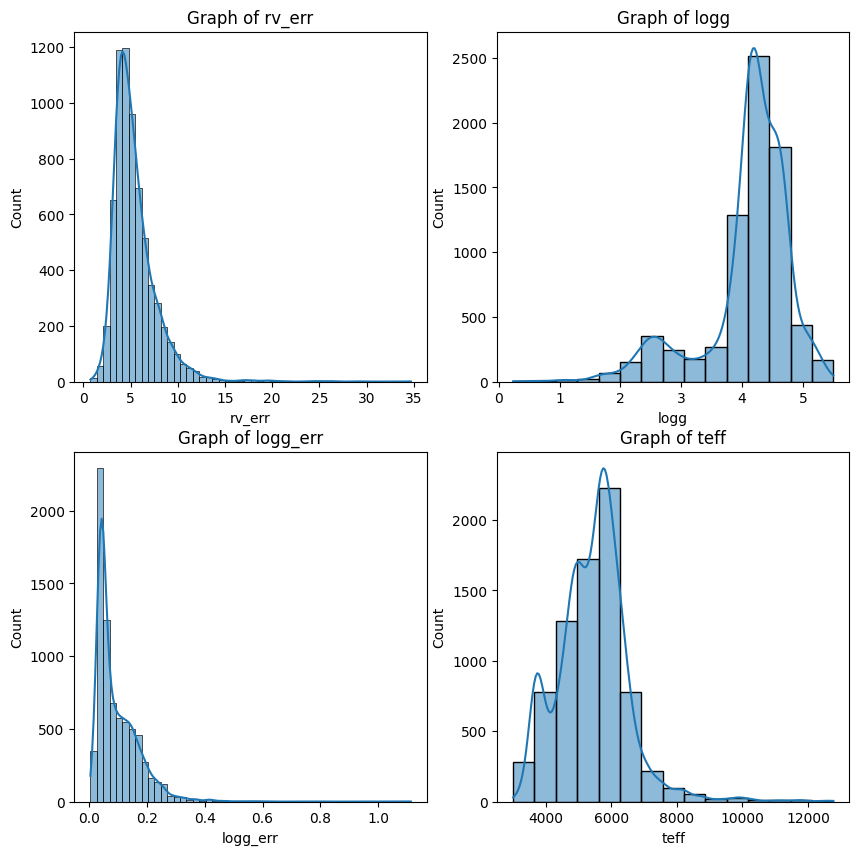

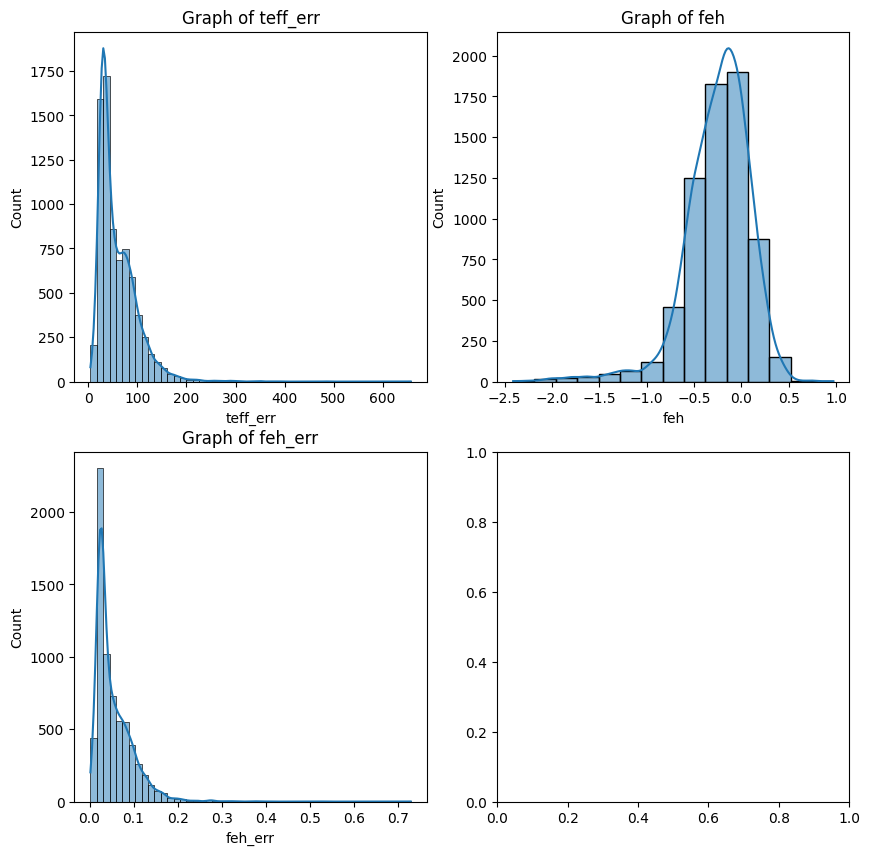

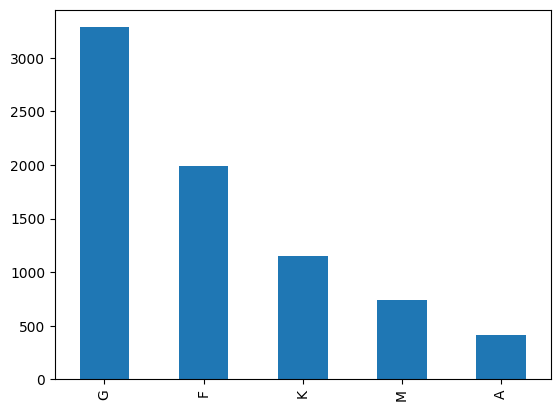

In [19]:
#Numerical variables
num_cols = [col for col in df.columns if df[col].dtypes == "int" or df[col].dtypes =='float']
for j in range (0, len(num_cols), 4):
    fig, ax = plt.subplots(2,2, figsize=(10,10))
    for i, col in enumerate(num_cols[j:j+4]):
        if i%2 == 0:
            ax[i//2,0].set_title('Graph of ' +col) 
            sns.histplot(df[col], kde= True, bins= 50, ax= ax[i//2,0])
             
        if i%2 != 0:
            ax[(i-1)//2,1].set_title('Graph of ' + col)
            sns.histplot(df[col],kde = True,  bins= 15, ax= ax[(i-1)//2,1])
            
plt.show()  

#Categorical variables
cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
for col in cat_cols:
    df[col].value_counts().plot(kind='bar')


The graph of feh, rv_err and rv are close to the gaussian distribution. The others are not close. The distribution of categorical values (class) are not balanced. 

### 7) Quantile-Quantile plots (15p)
* Create an array called "s1" filled with random numbers sampled from the standard normal distribution. $(\mu = 0,\ \ \sigma = 1)$ 
<br>Then sort this array in an ascending order. Make sure the array has length equal to the number of non NA observations in the data.

* Next, create a similar array called "s2", but this time sample from the rayleigh distribution. $(\sigma = 1)$

* Assemble 2 scatter plots with s1 and s2 in the x axes and the **sorted** versions of a gaussian-like variable and a right-skewed variable in the y axes respectively.<br>Are they similar to the Q-Q plots of those variables generated by existing functions? Explain how the similarities came about, as well as any differences.

**Note: Drop NA's for plotting purposes as sorting arrays with NA's can cause issues.**

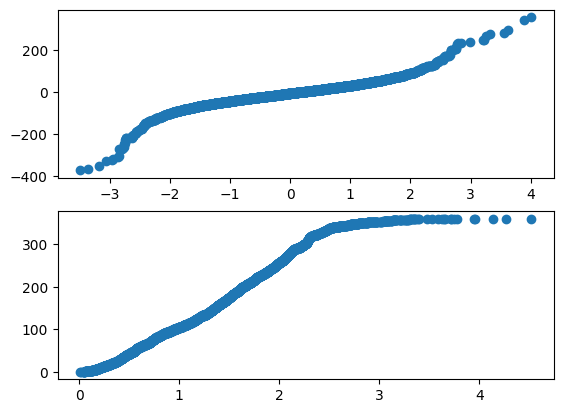

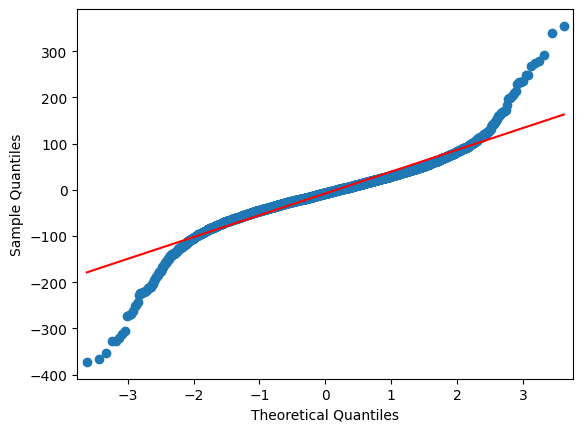

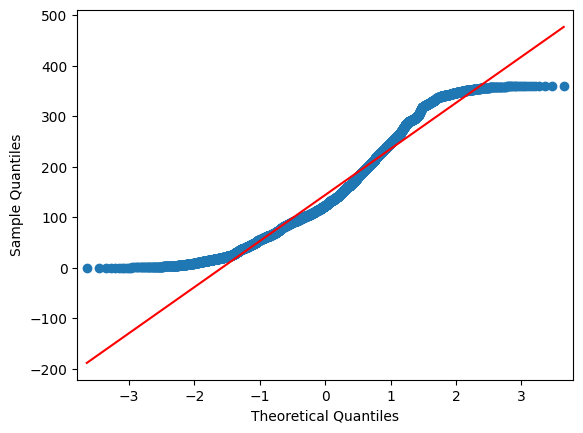

In [142]:
s1 = np.random.normal(loc=0, scale=1, size=df['rv'].notna().sum().sum())
s1.sort()
s2 = np.random.rayleigh(scale= 1, size=df['ra'].notna().sum().sum())
s2.sort()

gaussian_like = df.loc[df['rv'].notna(), 'rv']
gaussian_like_sort= gaussian_like.sort_values()

right_skew= df.loc[df['ra'].notna(), 'ra']
right_skew_sort= right_skew.sort_values()

fig, axes = plt.subplots(2)
axes[0].scatter(s1,gaussian_like_sort)
axes[1].scatter(s2,right_skew_sort)

fig = sm.qqplot(gaussian_like_sort, line='s')
fig = sm.qqplot(right_skew_sort, line='s')


S1 is generated from more than 6500 values by using the np.random.normal function and qq plot demonstrates normal distribution, so they are similar. On the other hand, scatter plot and qqplot of right skewed ra, are not so similar. Especially, begininng and ending part of the data differ a lot.

### 8) Looking out for correlations and outliers (20p)

* Generate a correlation matrix of the data and comment on any significant correlations.

* Even after the data cleaning step, one variable has noticably more NaN values than the rest.<br>For this variable, devise a scheme to determine if this is in any way connected to "class" or "subclass".

* Determine the number of outlier cases for each variable. Based on your intuition, is it okay to remove rows with outliers, or NaN values?

In [1]:
#Correlation
corr= df.corr()

sns.heatmap(corr.round(1), cmap="BuPu", annot= True)
plt.show()

#panstarss1_y
df_by_class = df.groupby('class').agg({'panstarss1_y': lambda x: x.isna().sum()})
print(df_by_class)
fig, ax = plt.subplots()
ax.bar(df_by_class.index, df_by_class['panstarss1_y'] )
ax.set_ylim([190, 2000])

#Outliers
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit
def check_outlier(dataframe, col_name):
    lower_limit, upper_limit = outlier_thresholds(dataframe, col_name)
    return ((dataframe[col_name]> upper_limit) | (dataframe[col_name]< lower_limit)).sum()

for col in num_cols:
    print(col, ':', check_outlier(df,col))

NameError: name 'df' is not defined

> Dark purple indicates high correlation. According to the heatmap, rv and z and their errors are strongly correlated. Actually, all of the error variables are strongly correlated. <br> G and F classes have more nan values than other classes. <br> Since there is lots of outliers or NaN values in certain columns, deleting these columns does not make sense. Information can be lost, so instead of deleting, other methods should be preffered such as re-assignment with thresholds, median , predictive methods.

### 9) The spectral sequence (15p)

Use graphs (or `groupby`) to see if any of the calculated attributes (those with "_err" columns) can explain the star's class. (the column you created)<br>In other words, characterize each main star type using the calculated physical characteristics.

          z_err    rv_err  logg_err   teff_err   feh_err
class                                                   
A      0.000023  6.825960  0.093077  59.558653  0.057825
F      0.000018  5.448630  0.084275  54.806240  0.054356
G      0.000018  5.288502  0.081626  53.110033  0.052788
K      0.000017  5.219669  0.091352  58.026040  0.059466
M     -0.005385       NaN  0.200757  97.771068       NaN


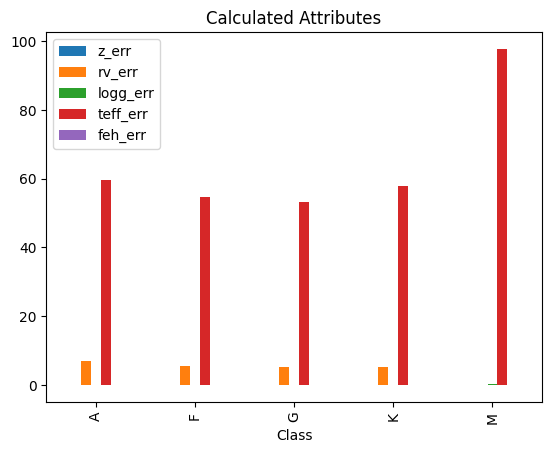

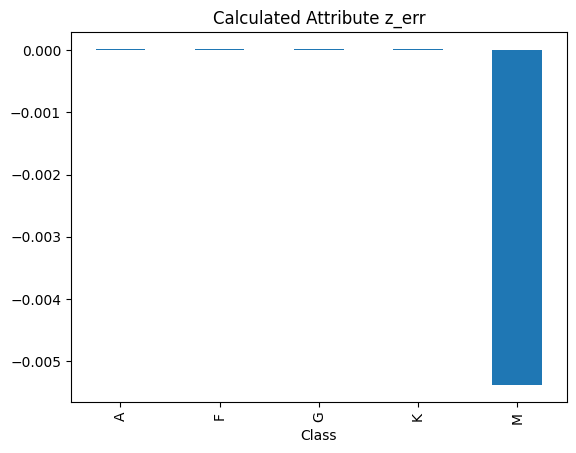

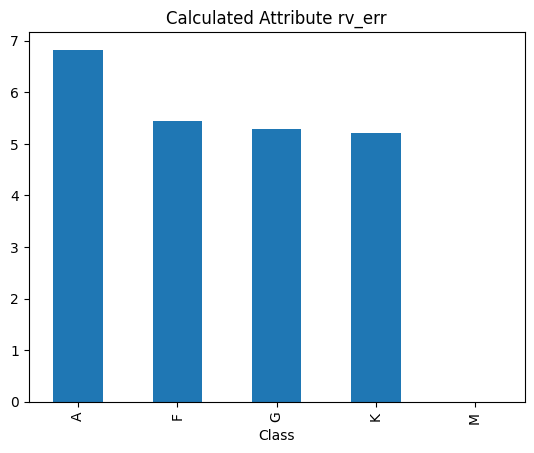

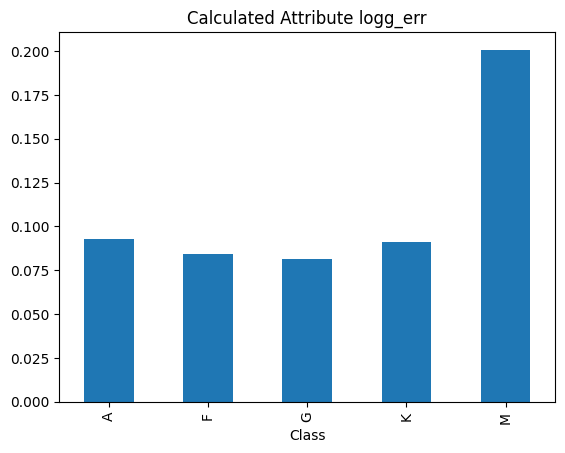

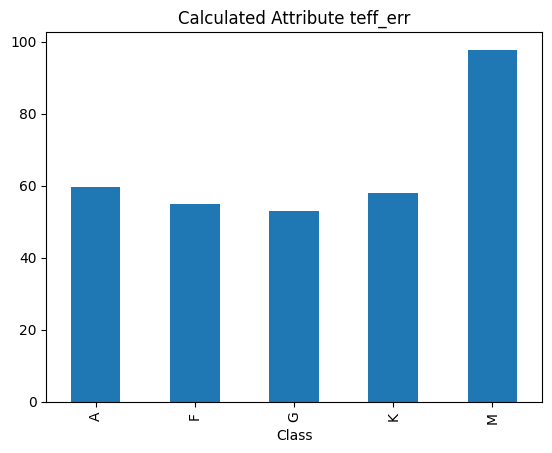

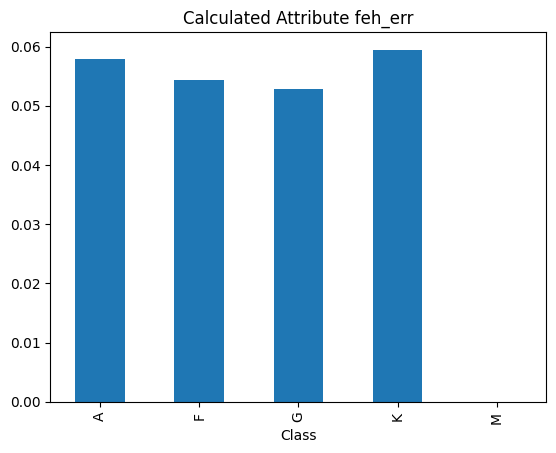

In [69]:
calc_attributes= [col for col in df.columns if '_err' in col]
df_calc_att= df.groupby('class')[calc_attributes].mean()
print(df_calc_att)

ax = df_calc_att.plot(kind='bar')
ax.set_xlabel('Class')
ax.set_title('Calculated Attributes')
plt.show()

# See one by one each _err column for better view.
for err in calc_attributes:
    ax = df_calc_att[err].plot(kind='bar')
    ax.set_xlabel('Class')
    ax.set_title('Calculated Attribute ' + err )
    plt.show()

rv_err and feh_err of M class contains only NaN values. If z_err is smaller than 0, the star belongs to M class. If rv_err is higher than 6, the star belongs to A class. Except z_err and NaN value columns of M, M class has higher values.